# Part 1
## Ans 1) 
The joint probability of the people who planned to purchase and actually
placed an order : 100/2000 = 0.05 or 5%
the joint probability of the people who planned to purchase and actually
placed an order, given that people planned to purchase : 0.2 or 20%

In [1]:
p=100/2000
print(p)
p=100/500
print(p)

0.05
0.2


## Ans 2)
A. Probability that none of the items are defective

In [2]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
# Number of samples
n=10
# probability of failure 0.05
p=0.05
k=np.arange(0,11)
binomial = stats.binom.pmf(k,n,p)
# Probability that none of the items are defective
binomial[0]

0.5987369392383789

Probability that none of the items are defective=0.598736

B. Probability that exactly one of the items is defective

In [4]:
binomial[1]

0.31512470486230504

Probability that exactly one of the items is defective=0.315124

C. Probability that two or fewer of the items are defective

In [5]:
s=binomial[0]+binomial[1]+binomial[2]
print('Probability that two or fewer of the items are defective=',s)

Probability that two or fewer of the items are defective= 0.9884964426207035


D. Probability that three or more of the items are defective

In [6]:
print(' Probability that three or more of the items are defective = ',(1-s))

 Probability that three or more of the items are defective =  0.011503557379296536


## Ans 3)
A. Probability that in a given week he will sell some cars.

In [7]:
#average rate, denoted with lambda in the formula for poisson distribution 

rate = 3
#a numpy array for constructing a probability distribution

n=np.arange(0,20)
#calculating the distribution and storing the distribution of probablitites in an array
poisson = stats.poisson.pmf(n,rate)

print('Probability that in a given week he will sell some cars =',(1-poisson[0]))

Probability that in a given week he will sell some cars = 0.950212931632136


B. Probability that in a given week he will sell 2 or more but less than 5 cars.

In [8]:
p2=(poisson[2]+poisson[3]+poisson[4])
print('Probability that in a given week he will sell 2 or more but less than 5 cars =',p2)

Probability that in a given week he will sell 2 or more but less than 5 cars = 0.6161149710523164


C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold perweek.

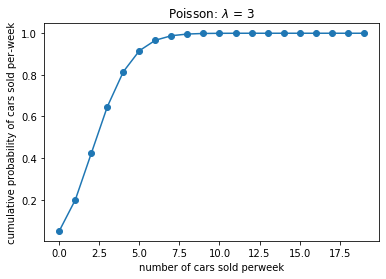

In [9]:
# getting cumulative pobability distribution
poisson = stats.poisson.cdf(n,rate)
#visualising the plot with pyplot

plt.plot(n,poisson,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('number of cars sold perweek')
plt.ylabel(' cumulative probability of cars sold per-week ')
plt.show()

## Answer 4)

A. What is the probability that all three orders will be recognised correctly

In [10]:
# Number of orders
n=3
# probability of correct order
p=0.868
k=np.arange(0,4)
binomial = stats.binom.pmf(k,n,p)
print('The probability that all three orders will be recognised correctly =',binomial[3])

The probability that all three orders will be recognised correctly = 0.653972032


B. The probability that none of the three orders will be recognised correctly

In [11]:
print('The probability that none of the three orders will be recognised correctly = ',binomial[0])

The probability that none of the three orders will be recognised correctly =  0.002299968


C. The probability that at least two of the three orders will be recognised correctly

In [12]:
p2=binomial[2]+binomial[3]
print('The probability that at least two of the three orders will be recognised correctly =',p2)

The probability that at least two of the three orders will be recognised correctly = 0.9523279359999999


## Ans 5)

A. The percentage of students who score more than 80

In [13]:
# Using normal distribution
a=(1-stats.norm.cdf(80,loc=60,scale=12))
print('The percentage of students who score more than 80 =',a)

The percentage of students who score more than 80 = 0.047790352272814696


B. The percentage of students who score less than 50

In [14]:
b=(stats.norm.cdf(50,loc=60,scale=12))
print('The percentage of students who score less than 50 =',b)

The percentage of students who score less than 50 = 0.20232838096364308


C. The distinction mark if the highest 10% of students are to be awarded distinction

In [15]:
# from standard normal distribution of z we know 90% cumulative probability occurs at 1.282 standard deviation 
# Hence marks beyond which 10% of highest students can be found as (x=1.282*sd + mean)

x=1.282*12+60
print(x)
print(stats.norm.cdf(x,loc=60,scale=12))
print('The distinction marks is = ',x)

75.384
0.9000786768866171
The distinction marks is =  75.384


## Ans 6)

It is known from past experience that in a plant there are on average 4 industrial accidents in a year.
The probability that in a year less than 4 accidents occur can found using poisson distribution 

In [16]:
rate = 4
#a numpy array for constructing a probability distribution

n=np.arange(0,20)
#calculating the distribution and storing the distribution of probablitites in an array
poisson = stats.poisson.pmf(n,rate)
p4=poisson[0]+poisson[1]+poisson[2]+poisson[3]
print('Probability of less than 4 accidents in a year = ',p4)
print('Probability of no accidents in a year = ',poisson[0])

Probability of less than 4 accidents in a year =  0.43347012036670884
Probability of no accidents in a year =  0.01831563888873418


# Part Two
## Domain: Sports

### 1.  Reading and cleaning datasets

In [17]:
ch = pd.read_csv("DS - Part2 - Basketball.csv")
ch.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [18]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [19]:
s=ch["TeamLaunch"]
# Converting years in to integer format such that low year is taken as team launch year 
year=s.copy()

for i in range(61):
    year[i]=""
    for c in s[i]:
        if c.isdigit():
            year[i]=year[i]+c
            if(len(year[i])==4):
                break
type(year)
        

pandas.core.series.Series

In [20]:
# replacing - with 0 in all places
ch.replace('-',0,inplace=True)

In [21]:
# Making final data set
df1 = pd.concat([ch["Team"],year],axis=1,sort=False)

In [22]:
df1['Tournament']=ch['Tournament']
df1["Score"]=ch["Score"].astype('int64')

In [23]:
df1["WonGames"]=ch["WonGames"].astype(int)
df1["PlayedGames"]=ch["PlayedGames"].astype(int)
df1["DrawnGames"]=ch["DrawnGames"].astype(int)
df1["LostGames"]=ch["LostGames"].astype(int)
df1["BasketScored"]=ch["BasketScored"].astype(int)
df1["BasketGiven"]=ch["BasketGiven"].astype(int)
df1["TournamentChampion"]=ch["TournamentChampion"].astype(int)
df1["Runner-up"]=ch["Runner-up"].astype(int)
df1["HighestPositionHeld"]=ch["HighestPositionHeld"]
df1["TeamLaunch"]=df1["TeamLaunch"].astype(int)

In [24]:
df1

,Team,TeamLaunch,Tournament,Score,WonGames,PlayedGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld
0,Team 1,1929,86,4385,1647,2762,552,563,5947,3140,33,23,1
1,Team 2,1929,86,4262,1581,2762,573,608,5900,3114,25,25,1
2,Team 3,1929,80,3442,1241,2614,598,775,4534,3309,10,8,1
3,Team 4,1931,82,3386,1187,2664,616,861,4398,3469,6,6,1
4,Team 5,1929,86,3368,1209,2762,633,920,4631,3700,8,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,2009,1,34,8,38,10,20,38,66,0,0,20
57,Team 58,1956,1,22,7,30,8,15,37,57,0,0,16
58,Team 59,1951,1,19,7,30,5,18,51,85,0,0,16
59,Team 60,1955,1,14,5,30,4,21,34,65,0,0,15


### 2. EDA

In [25]:
# Calculating probability of any team winning
df1['WinProb']=df1['WonGames']/df1['PlayedGames']
df1['WinProb'].fillna(0, inplace = True)
print(df1['WinProb'])
# ch.info()
# df1.info()

0     0.596307
1     0.572411
2     0.474751
3     0.445571
4     0.437726
        ...   
56    0.210526
57    0.233333
58    0.233333
59    0.166667
60    0.000000
Name: WinProb, Length: 61, dtype: float64


In [26]:
# Finding oldest and newest teams
df1.sort_values(by='TeamLaunch' )
print('Oldest teams')
print(df1[['Team','TeamLaunch']].loc[df1['TeamLaunch']==df1['TeamLaunch'].min()])
print('Newest teams')
print(df1[['Team','TeamLaunch']].loc[df1['TeamLaunch']==df1['TeamLaunch'].max()])

Oldest teams
       Team  TeamLaunch
0    Team 1        1929
1    Team 2        1929
2    Team 3        1929
4    Team 5        1929
6    Team 7        1929
7    Team 8        1929
13  Team 14        1929
44  Team 45        1929
51  Team 52        1929
53  Team 54        1929
Newest teams
       Team  TeamLaunch
60  Team 61        2017


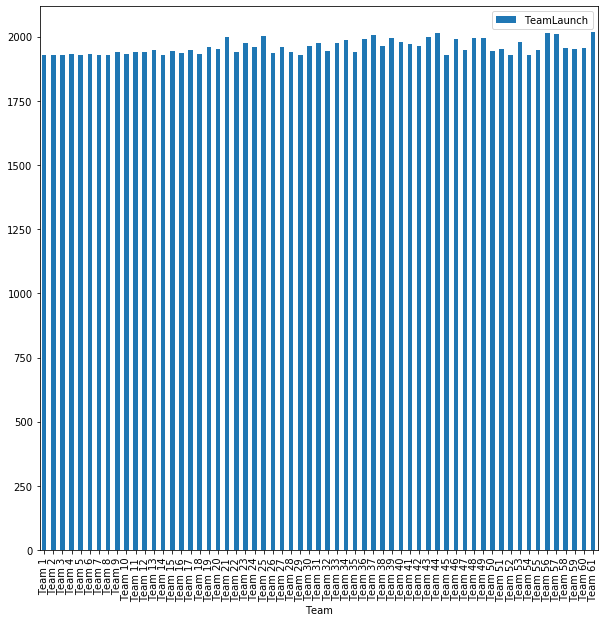

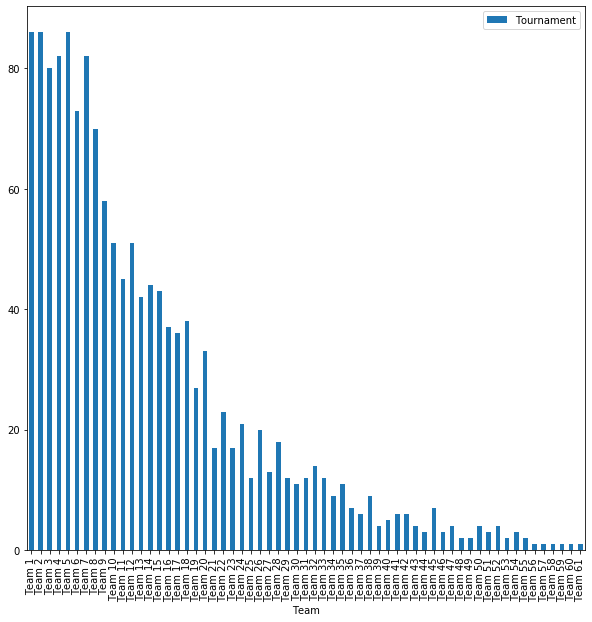

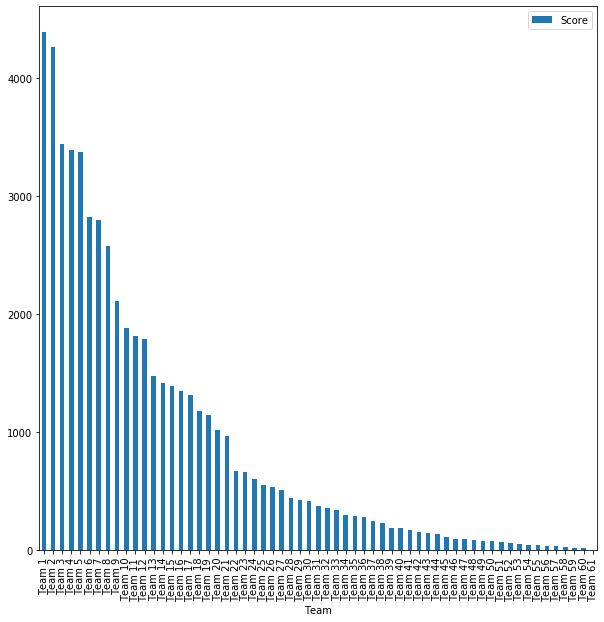

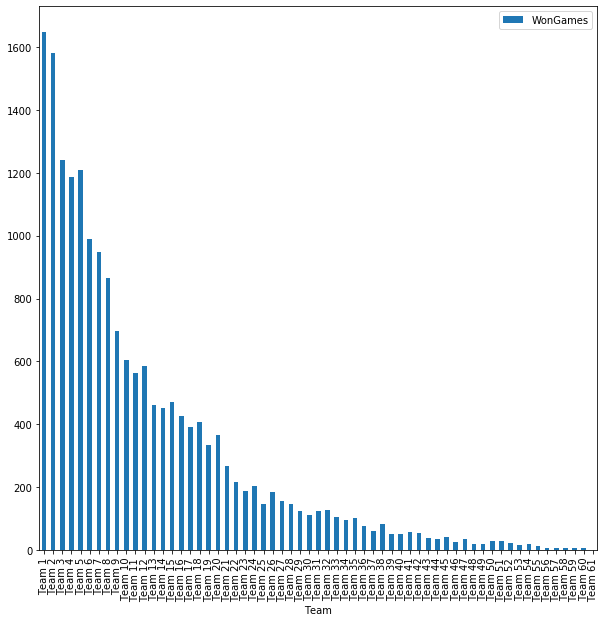

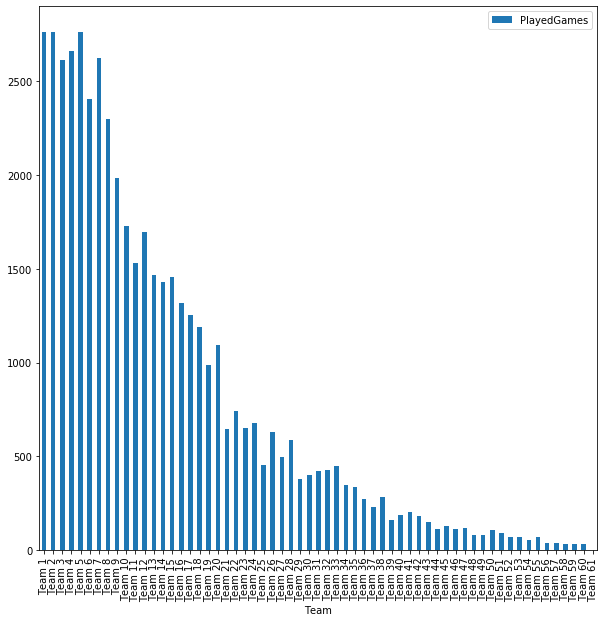

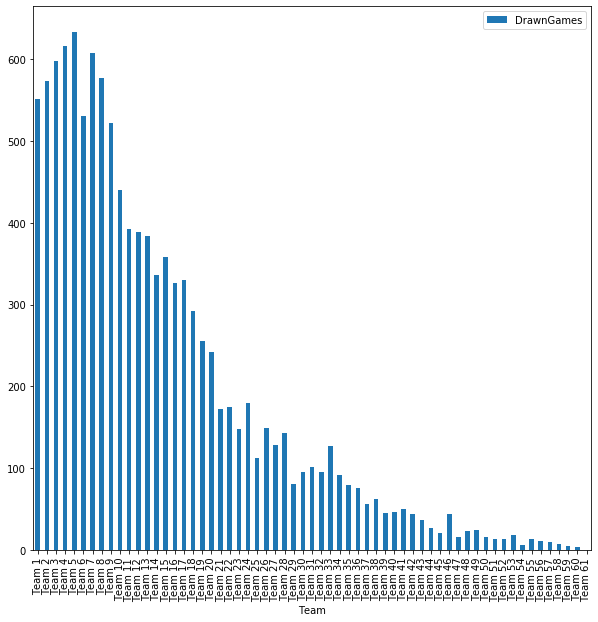

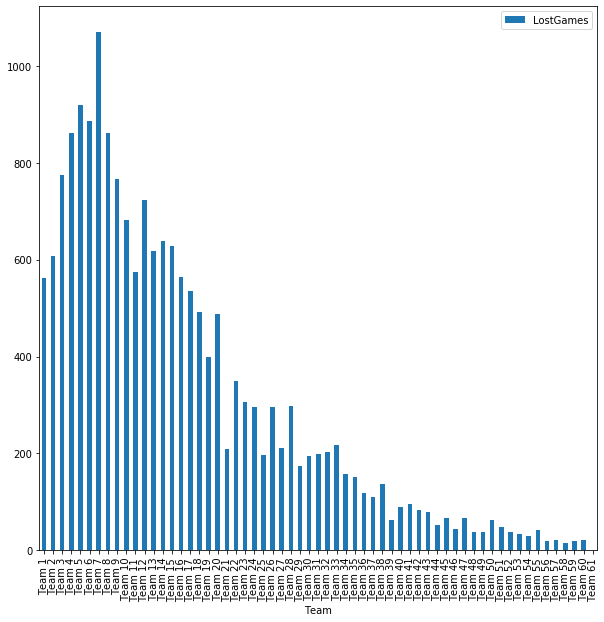

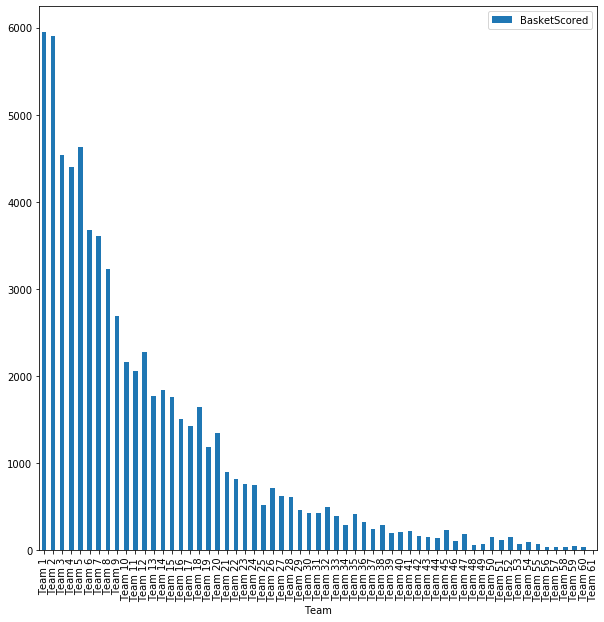

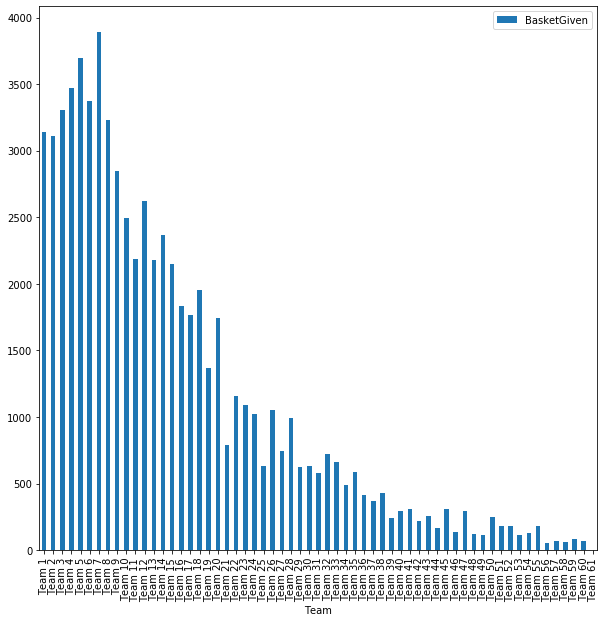

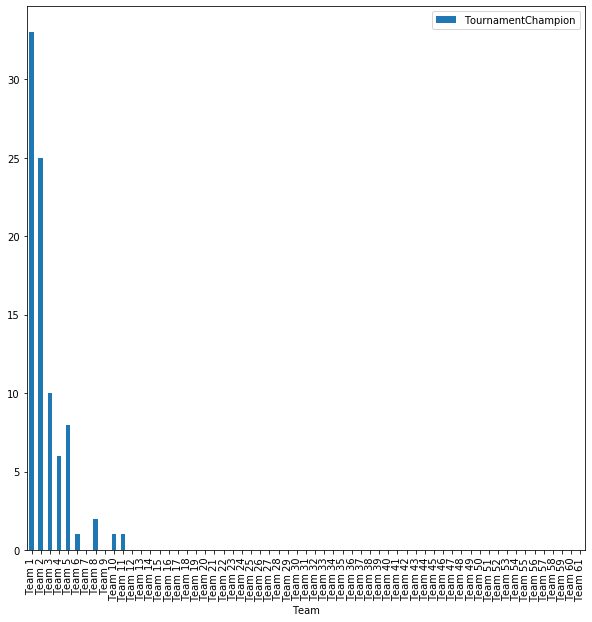

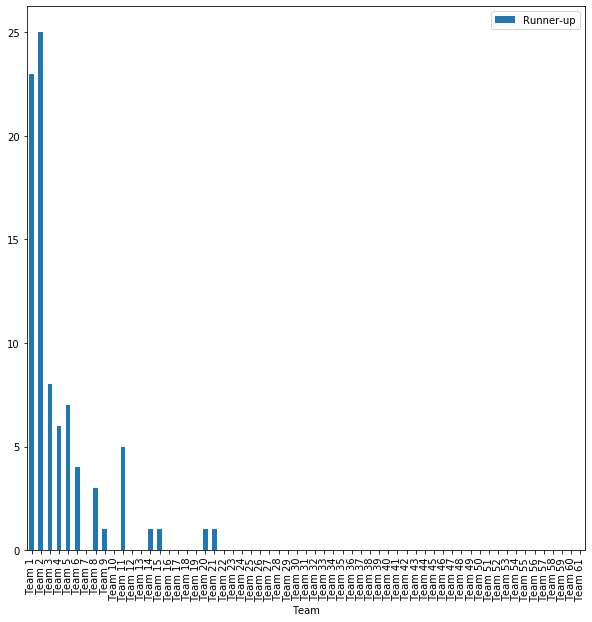

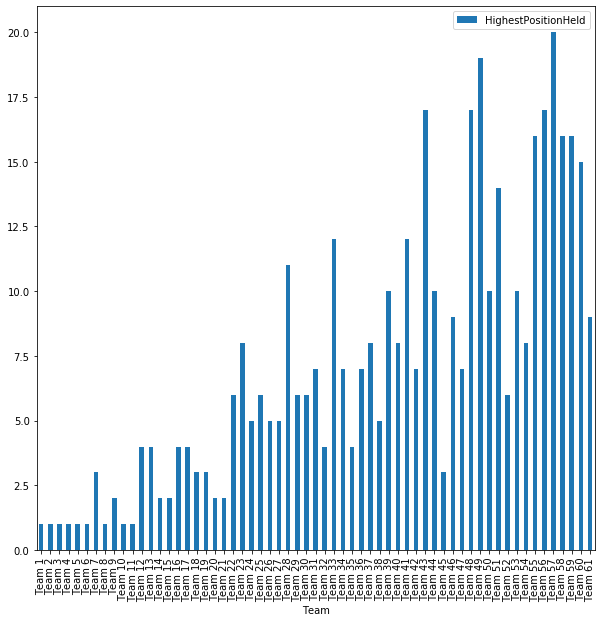

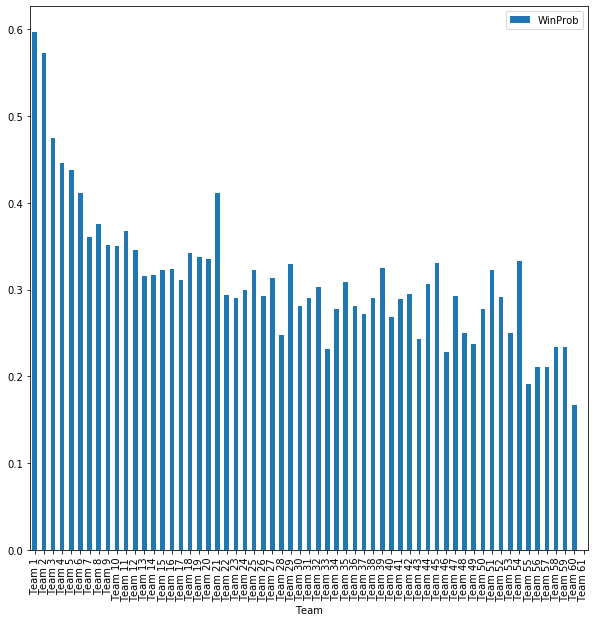

In [27]:
# Ploting all columns vs Team
for x in range(1,14):
    df1.plot.bar(x='Team',y=x,figsize=(10,10))


We can compare teams on basis of winning probability, highest position attained and number of runner ups attained from these graphs
We ignore team 61 as its data is not available
Team 1 has highest chance of winning followed by team 2
Team2 and Team1 have highest runnerups

Team 57 has not attained better position than 20

In [28]:
df1.describe()

,TeamLaunch,Tournament,Score,WonGames,PlayedGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,WinProb
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1958.918033,24.000000,901.426230,303.967213,796.819672,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,7.081967,0.308506
std,27.484114,26.827225,1134.899121,406.991030,876.282765,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,5.276663,0.087426
min,1929.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1935.000000,4.000000,96.000000,34.000000,114.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,3.000000,0.271930
50%,1951.000000,12.000000,375.000000,123.000000,423.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,6.000000,0.302817
75%,1978.000000,38.000000,1351.000000,426.000000,1318.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,10.000000,0.334854
max,2017.000000,86.000000,4385.000000,1647.000000,2762.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,20.000000,0.596307


Half the teams launched are launched after 1951 can be inferred

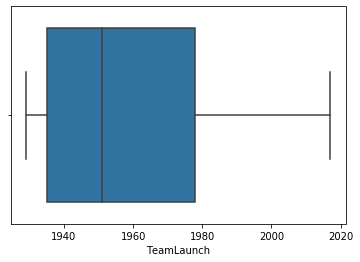

In [29]:
sns.boxplot(df1['TeamLaunch'])

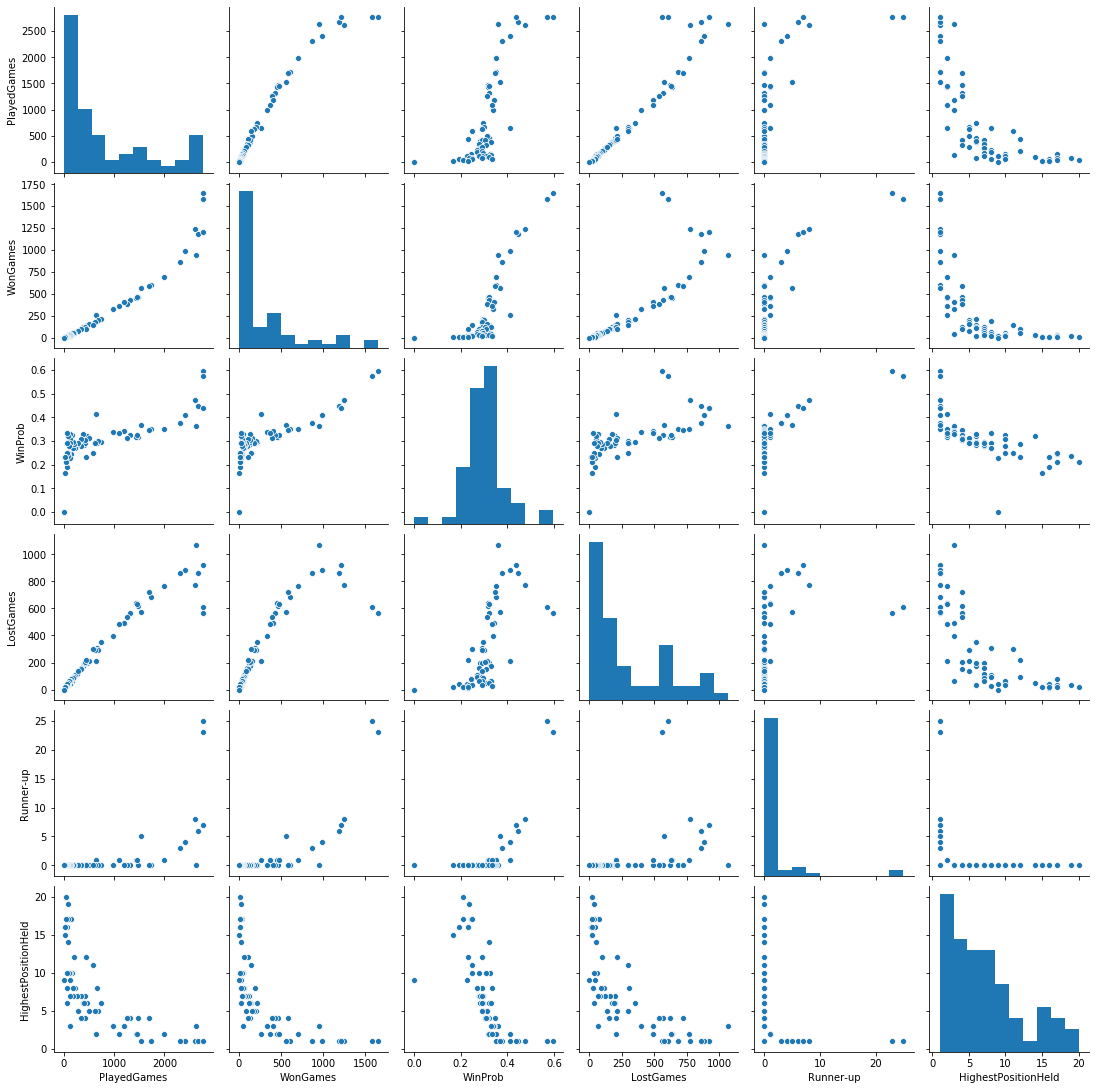

In [30]:
sns.pairplot(df1[['Team','PlayedGames','WonGames','WinProb','LostGames','Runner-up','HighestPositionHeld']])

In [31]:
# Creating data set of newer teams after 1951
young=df1.loc[df1['TeamLaunch']>1951]
young.describe()

,TeamLaunch,Tournament,Score,WonGames,PlayedGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,WinProb
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000
mean,1982.931034,7.517241,278.931034,81.862069,271.620690,69.344828,120.068966,301.862069,400.620690,0.0,0.034483,10.034483,0.266781
std,20.287102,6.684848,284.997485,82.591821,244.185587,62.767300,101.368469,294.639456,349.595727,0.0,0.185695,4.938788,0.070007
min,1953.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000
25%,1963.000000,2.000000,81.000000,20.000000,80.000000,23.000000,37.000000,71.000000,117.000000,0.0,0.000000,7.000000,0.237500
50%,1979.000000,6.000000,188.000000,53.000000,186.000000,46.000000,90.000000,202.000000,296.000000,0.0,0.000000,9.000000,0.281095
75%,1998.000000,12.000000,375.000000,113.000000,423.000000,102.000000,197.000000,422.000000,632.000000,0.0,0.000000,14.000000,0.299410
max,2017.000000,27.000000,1148.000000,333.000000,988.000000,256.000000,399.000000,1182.000000,1371.000000,0.0,1.000000,20.000000,0.411765


In [32]:
win=df1.sort_values(by='WinProb' )
win[['Team','WinProb','TeamLaunch']].tail(10)
# Top 10 teams considering with highest wining probability

,Team,WinProb,TeamLaunch
6,Team 7,0.361005,1929
10,Team 11,0.367974,1941
7,Team 8,0.375326,1929
5,Team 6,0.411130,1934
20,Team 21,0.411765,1998
4,Team 5,0.437726,1929
3,Team 4,0.445571,1931
2,Team 3,0.474751,1929
1,Team 2,0.572411,1929
0,Team 1,0.596307,1929


Teams 21 inspite of being a young team has very high winning probability 

In [33]:
# Top 10 new teams considering with highest wining probability
win=young.sort_values(by='WinProb')
win[['Team','WinProb','TeamLaunch']].tail(10)

,Team,WinProb,TeamLaunch
37,Team 38,0.290780,1962
41,Team 42,0.294444,1963
23,Team 24,0.299410,1959
43,Team 44,0.307018,2014
26,Team 27,0.313765,1961
50,Team 51,0.322222,1953
24,Team 25,0.322368,2004
38,Team 39,0.325000,1994
18,Team 19,0.337045,1960
20,Team 21,0.411765,1998


Team 25 and 44 also have good winning probability 

In [34]:
# 10 teams considering with least wining probability
s=win[win['WinProb']>0]
s[['Team','WinProb']].head(10)

,Team,WinProb
59,Team 60,0.166667
56,Team 57,0.210526
55,Team 56,0.210526
45,Team 46,0.228070
32,Team 33,0.232143
57,Team 58,0.233333
48,Team 49,0.237500
42,Team 43,0.243421
52,Team 53,0.250000
47,Team 48,0.250000


In [35]:
print('Top 10 teams with better highest position attained')
high=df1.sort_values(by='HighestPositionHeld' )
high[['Team','HighestPositionHeld','TeamLaunch']].head(10)

Top 10 teams with better highest position attained


,Team,HighestPositionHeld,TeamLaunch
0,Team 1,1,1929
1,Team 2,1,1929
2,Team 3,1,1929
3,Team 4,1,1931
4,Team 5,1,1929
5,Team 6,1,1934
7,Team 8,1,1929
9,Team 10,1,1932
10,Team 11,1,1941
8,Team 9,2,1939


In [36]:
print('Top 10 young teams with better highest position attained')
high=young.sort_values(by='HighestPositionHeld' )
high[['Team','HighestPositionHeld','TeamLaunch']].head(10)

Top 10 young teams with better highest position attained


,Team,HighestPositionHeld,TeamLaunch
20,Team 21,2,1998
18,Team 19,3,1960
23,Team 24,5,1959
26,Team 27,5,1961
37,Team 38,5,1962
24,Team 25,6,2004
29,Team 30,6,1963
41,Team 42,7,1963
30,Team 31,7,1974
33,Team 34,7,1987


Team 21 and 25 are young yet have attained ranks 2 and 6 respectively

In [37]:
print('Correlation between different variables')
cor=df1[['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']].corr()
cor

Correlation between different variables


,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Tournament,1.000000,0.981441,0.998677,0.971954,0.989387,0.949863,0.975059,0.987828,0.589072,0.645876,-0.603151,-0.708071
Score,0.981441,1.000000,0.979824,0.997240,0.958452,0.880040,0.996656,0.944263,0.714280,0.764278,-0.543432,-0.669775
PlayedGames,0.998677,0.979824,1.000000,0.967641,0.994053,0.956503,0.970127,0.990129,0.574716,0.632921,-0.587451,-0.710876
WonGames,0.971954,0.997240,0.967641,1.000000,0.939844,0.852785,0.999318,0.926234,0.752204,0.797350,-0.543854,-0.648628
DrawnGames,0.989387,0.958452,0.994053,0.939844,1.000000,0.973156,0.942668,0.992579,0.503472,0.566269,-0.577616,-0.719845
LostGames,0.949863,0.880040,0.956503,0.852785,0.973156,1.000000,0.859169,0.985275,0.325462,0.393211,-0.600513,-0.725149
BasketScored,0.975059,0.996656,0.970127,0.999318,0.942668,0.859169,1.000000,0.931548,0.743144,0.790532,-0.553453,-0.649455
BasketGiven,0.987828,0.944263,0.990129,0.926234,0.992579,0.985275,0.931548,1.000000,0.471824,0.533814,-0.615715,-0.726610
TournamentChampion,0.589072,0.714280,0.574716,0.752204,0.503472,0.325462,0.743144,0.471824,1.000000,0.971552,-0.284878,-0.305397
Runner-up,0.645876,0.764278,0.632921,0.797350,0.566269,0.393211,0.790532,0.533814,0.971552,1.000000,-0.315881,-0.360408


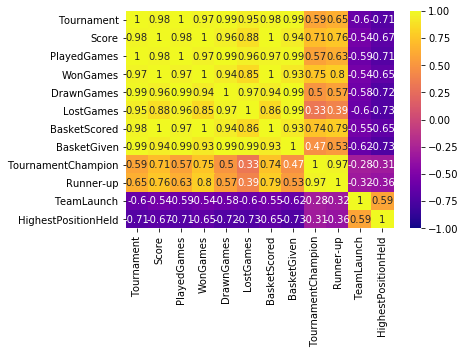

In [38]:
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)

### 3 Suggestions

1 value of year can be either in singe year format or in two year format
2 Information about team perfomance such as matches won or scores can be given on monthly or yearly basis so that performance of teams in recent years can be understood for better comparison 
 

# Part Three
## Domain: Sartup ecosystem

### 1. Data warehouse

In [39]:
df1 = pd.read_csv("DS - Part3 - CompanyX_EU.csv")


### 2. Data exploration:

In [40]:
df1.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,CLASEMOVIL,learnhownow.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [42]:
 total = df1.isnull().sum()
print('Null values in the attributes :')
print(total)

Null values in the attributes :
Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


In [43]:
df1.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [44]:
df1.shape

(662, 6)

### 3. Data preprocessing & visualisation

In [45]:
df=df1.dropna()

In [46]:
df.shape

(446, 6)

In [47]:
df.index=range(446)

In [48]:
df

,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
3,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
4,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
441,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
442,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
443,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
444,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [49]:
#  Function for converting the ‘Funding’ features to a numerical value 
def dollar_to_number(s):
    n=''
    di = {'K':1000, 'M':1000000, 'B':1000000000}
    for i in range(1,(len(s)-1)):
        n=n+s[i]
    val=float(n)
    val=val*di[s[(len(s)-1)]]
    return val

In [50]:
#  Converting the ‘Funding’ features to a numerical value 
y=df['Funding']
# print(y)
c=y.copy()
# print(c)
n=0
for j in y:
    j=str(j)
    if j!='nan':
        amt=dollar_to_number(j)
        c[n]=amt
        n=n+1


In [51]:
c.astype(int)

0         630000
1        1000000
2       19300000
3       29000000
4        1800000
         ...    
441      8000000
442      1000000
443    223000000
444      3400000
445     31500000
Name: Funding, Length: 446, dtype: int32

In [52]:
# Replacing Funding
df=df.drop(['Funding'], axis = 1)
df["Funding"]=c.astype(int)
df

,Startup,Product,Event,Result,OperatingState,Funding
0,3DLT,3dlt.com,Disrupt NYC 2013,Contestant,Closed,630000
1,3Dprintler,3dprintler.com,Disrupt NY 2016,Audience choice,Operating,1000000
2,5to1,5to1.com,TC50 2009,Contestant,Acquired,19300000
3,8 Securities,8securities.com,Disrupt Beijing 2011,Finalist,Operating,29000000
4,AdhereTech,adheretech.com,Hardware Battlefield 2014,Contestant,Operating,1800000
...,...,...,...,...,...,...
441,Zivity,zivity.com,TC40 2007,Contestant,Operating,8000000
442,Zmorph,zmorph3d.com,-,Audience choice,Operating,1000000
443,Zocdoc,zocdoc.com,TC40 2007,Contestant,Operating,223000000
444,Zula,zulaapp.com,Disrupt SF 2013,Audience choice,Operating,3400000


Box plot for funds in million


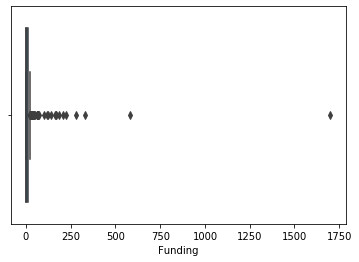

In [53]:
print('Box plot for funds in million')
sns.boxplot(df['Funding'].divide(1e6))
plt.show()

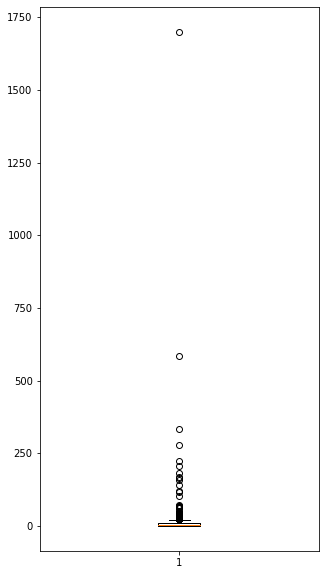

In [54]:
fundm=df['Funding'].divide(1e6)
fundm.describe()
fig = plt.figure(figsize =(5, 10))
 
# Creating plot
plt.boxplot(fundm)
 
# show plot
plt.show()

In [55]:
quartile_1 = fundm.quantile(0.25)
quartile_3 = fundm.quantile(0.75)
# Interquartile range
iqr = quartile_3 - quartile_1
lowfence= quartile_1-(1.5*iqr)
if lowfence<min(fundm):
    lowfence=min(fundm)
print('Lower fence is =',lowfence)


Lower fence is = 0.005


In [56]:
upfence=quartile_3+(1.5*iqr)
print('upperfence = ', upfence)
count=0
for i in fundm:
    if i>upfence:
        count=count+1
print('Number of outliers greater than upper fence = ',count)


upperfence =  22.569625
Number of outliers greater than upper fence =  60


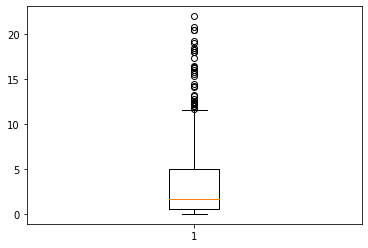

In [57]:
# Dropping values greater than upper fence
list1 = []
for i in fundm:
    if i<=upfence:
        list1.append(i)
        
#  The box plot after dropping the values greater than upper fence
# Creating plot
plt.boxplot(list1)
 
# show plot
plt.show() 

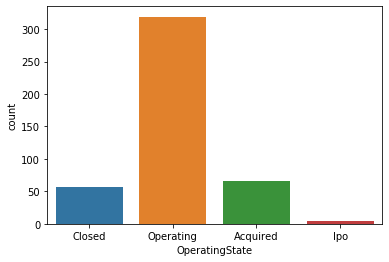

In [58]:
#  Frequency of operating state feature classes

sns.countplot(df['OperatingState'])

Distribution plot for Funds in million.

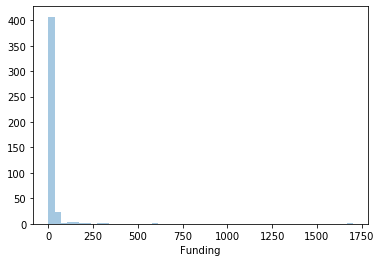

In [59]:
sns.distplot(df['Funding'].divide(1e6), kde=False);

Distribution plots for companies still operating and companies that closed.

Plots for companies dtill operating


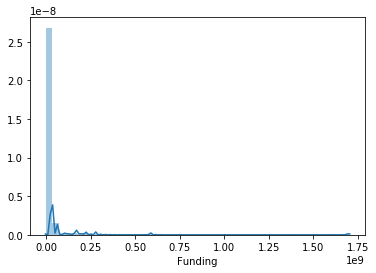

In [60]:
print('Plots for companies dtill operating')
oper=df.loc[df['OperatingState']=='Operating']

sns.distplot(oper['Funding'])

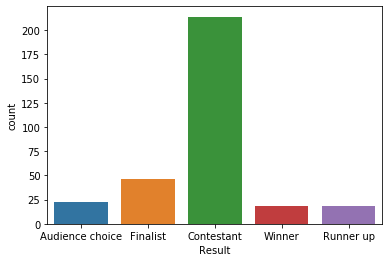

In [61]:
sns.countplot(oper['Result'])

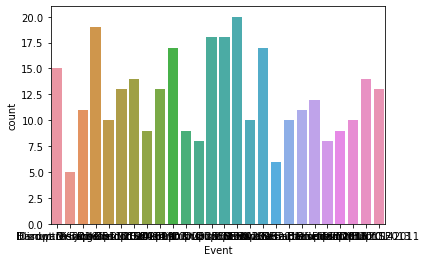

In [62]:
sns.countplot(oper['Event'])

Plots for companies closed

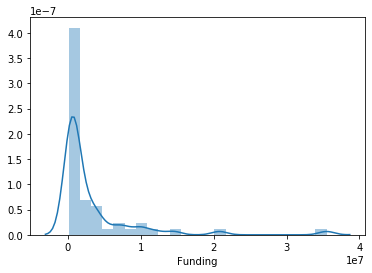

In [63]:
close=df.loc[df['OperatingState']=='Closed']
close.head(20)
sns.distplot(close['Funding'])

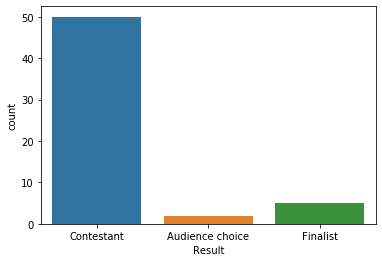

In [64]:
sns.countplot(close['Result'])

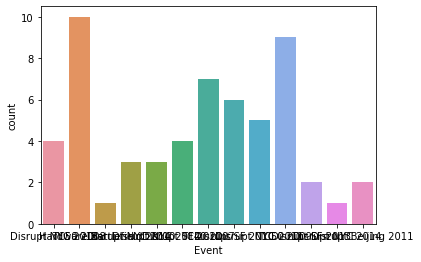

In [65]:
sns.countplot(close['Event'])

### Statistical analysis:

### The null hypothesis is that there is no significant difference between Funds raised by companies that are still operating vs companies that closed down

### The Alternate hypothesis is that there is a significant difference between Funds raised by companies that are still operating vs companies that closed down

In [66]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
t_statistic, pval = ttest_ind(oper['Funding'], close['Funding'])
print(t_statistic, pval)
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

1.138292452167138 0.2557270186090243
With a p-value of 0.2557 the difference is not significant. aka |We fail to reject the null|


In [67]:
# copy of original data frame
dfcopy =df1.copy()

Frequency distribution of Result variable

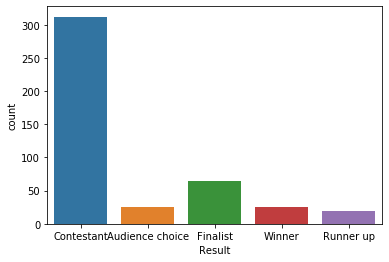

In [68]:
sns.countplot(df['Result'])

Percentage of winners that are still operating

In [69]:
winner=df[df['Result']=='Winner']
winner_operating=winner[winner['OperatingState']=='Operating']
print('Percentage of winners in operating state =')
print((len(winner_operating['OperatingState'])/len(winner['Result'])*100))

Percentage of winners in operating state =
72.0


Percentage of Contestants that are still operating

In [70]:
Contest=df[df['Result']=='Contestant']
Contest_operating=Contest[Contest['OperatingState']=='Operating']
print((len(Contest_operating['OperatingState'])/len(Contest['Result'])*100))

68.58974358974359


### The null hypothesis is that the proportion of operating companies in winners is same as proportion of operating companies in contestants

### The Alternate hypothesis is that the proportion of operating companies in winners is not same as proportion of operating companies in contestants

In [71]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([len(winner_operating['OperatingState']), len(Contest_operating['OperatingState'])] , [len(winner['Result']), len(Contest['Result'])])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.7232 the difference is not significant. aka |We fail to reject the null|


Distribution of the Event variable.

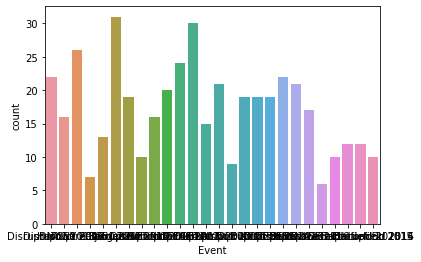

In [72]:
sns.countplot(df['Event'])

Event that has disrupt keyword from 2013 onwards

In [73]:
event=df['Event']
m=0
count=0
list1 = []
for i in event:
    temp=i.split()
    for n in temp:
        if n=='Disrupt':
            if int(temp[2])>=2013:
#                 print(i)
                count=count+1
                list1.append(m)
    m=m+1
result = df.iloc[list1]
# Event that has disrupt keyword from 2013 onwards are stored in result variable.

In [74]:

m=0
m1=0
m2=0
list1 = []
list2 = []
list3 = []
event=result['Event']
for i in event:
    temp=i.split()
    for n in temp:
        if n=='NY':
            list1.append(m)
        if n=='SF':
            list2.append(m1)
        if n=='EU':
            list3.append(m2)
    m=m+1
    m1=m1+1
    m2=m2+1

In [75]:
# Extracting data for companies across NY, SF and EU events from result
NY = result.iloc[list1]
SF = result.iloc[list2]
EU = result.iloc[list3]


In [76]:
NY1            = pd.DataFrame({'Event_Type': 'NY', 'Funding':NY['Funding']})
SF1            = pd.DataFrame({'Event_Type': 'SF', 'Funding':SF['Funding']})
EU1            = pd.DataFrame({'Event_Type': 'EU', 'Funding':EU['Funding']})
mean_Funding = pd.DataFrame()
mean_Funding = mean_Funding.append(NY1) 
mean_Funding = mean_Funding.append(SF1) 
mean_Funding = mean_Funding.append(EU1) 
print(mean_Funding)

    Event_Type  Funding
1           NY  1000000
28          NY   520000
32          NY    20000
35          NY  2800000
36          NY   125000
..         ...      ...
297         EU   948000
316         EU  7700000
334         EU  1400000
339         EU   684400
420         EU   275000

[133 rows x 2 columns]


### The null hypothesis is that the mean funding of companies accross NY, SF, EU is same

### The Alternate hypothesis is that the mean funding of companies accross NY, SF, EU is different

In [77]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Funding ~ Event_Type', data = mean_Funding).fit()
print(mod)
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq     df         F   PR(>F)
Event_Type  6.739584e+13    2.0  0.906534  0.40646
Residual    4.832394e+15  130.0       NaN      NaN


In this example, p value is 0.404 and it is greater than our chosen level of signifance at 5%
We fail to reject the null hypothesis

The distribution plot comparing the funding of 3 city events

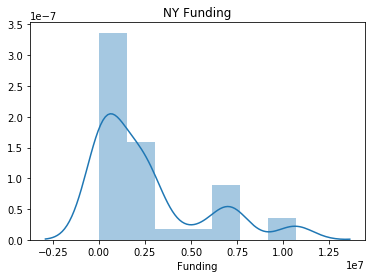

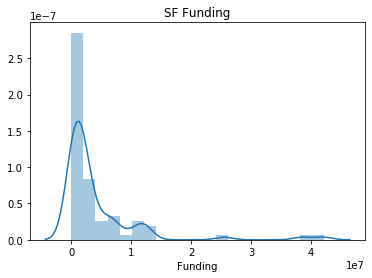

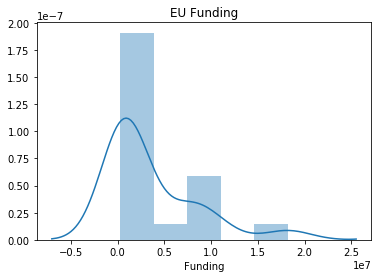

In [78]:
sns.distplot(NY['Funding'])
plt.title('NY Funding')
plt.show()
sns.distplot(SF['Funding'])
plt.title('SF Funding')
plt.show()
sns.distplot(EU['Funding'])
plt.title('EU Funding')
plt.show()


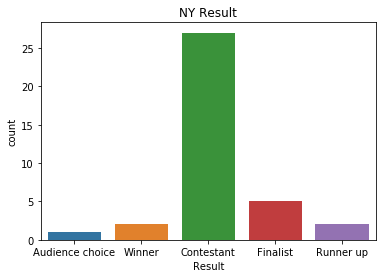

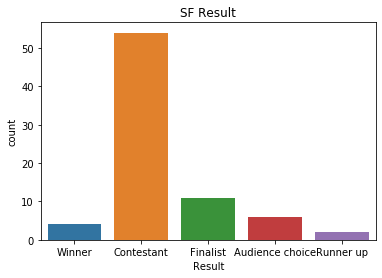

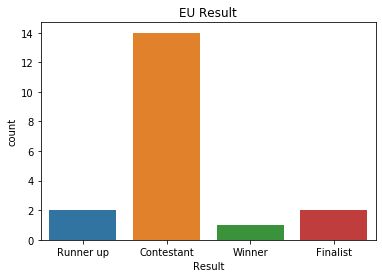

In [79]:
sns.countplot(NY['Result'])
plt.title('NY Result')
plt.show()
sns.countplot(SF['Result'])
plt.title('SF Result')
plt.show()
sns.countplot(EU['Result'])
plt.title('EU Result')
plt.show()

5 Data about number of employees in companies could be obtained 